<a href="https://colab.research.google.com/github/Arif-PhyChem/trace_conservation/blob/main/pinn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/Arif-PhyChem/trace_conservation/blob/main/pinn.ipynb)

In [1]:
import sys
import os

! git clone https://github.com/Arif-PhyChem/MLQD.git

Cloning into 'MLQD'...
remote: Enumerating objects: 1044, done.
remote: Counting objects: 100% (320/320), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 1044 (delta 162), reused 217 (delta 103), pack-reused 724 (from 1)
Receiving objects: 100% (1044/1044), 34.99 MiB | 21.68 MiB/s, done.
Resolving deltas: 100% (454/454), done.


In [2]:
# install the required packages

! pip install tensorflow --upgrade
! pip install sklearn
! pip install hyperopt

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
# Add MLQD's path to system path

mlqd_dir='MLQD/dev_ver'
sys.path.append(mlqd_dir)

from evolution import quant_dyn



In [4]:
# get training and test data files from github
! git clone https://github.com/Arif-PhyChem/trace_conservation.git

Cloning into 'trace_conservation'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 172 (delta 31), reused 0 (delta 0), pack-reused 110 (from 1)
Receiving objects: 100% (172/172), 201.89 MiB | 17.65 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Updating files: 100% (38/38), done.


# Physics Informed Neural Networks (PINNs)
In the case of PINNs, physical constraints are integrated into the loss function where an additional loss term $\mathcal{L}_\text{Tr}$ which penalizes the NN for the deviations from the trace conservation:

\begin{equation}
    \mathcal{L}_\text{PINN} =  \alpha\sum_{n=1}^N \mathcal{L}_{nn} + \eta \mathcal{L}_\text{Tr},
\end{equation}
where
\begin{equation}
    \mathcal{L}_\text{Tr} =  \sum_{m=1}^M \left( 1 - \sum_{n=1}^N \tilde{\rho}_{{\rm S},nn,m} \right)^2.
\end{equation}

\begin{equation}
    \mathcal{L}_\text{multi} =  \sum_{n=1}^N \mathcal{L}_{nn}.
\end{equation}

\begin{equation}
    \mathcal{L}_{nn} =  \sum_{m=1}^M \left(\bar{\tilde{\rho}}_{{\rm S},nn,m} - \tilde{\rho}_{{\rm S},nn,m} \right)^2,
\end{equation}

with $\bar{\tilde{\rho}}_{{\rm S},nn}$ as NN-predicted values and $\tilde{\rho}_{{\rm S},nn}$ as the reference counterpart. Furthermore, $M$ is the number of training points and $m$ is the index of a training point.

In these equations, we can tune $\mathcal{L}_{nn}$ and the deviations from trace conservation by weight factors $\alpha$ and $\eta$, respectively. Here we use $\alpha=2.0$ and $\eta=1.0$. Note that the unconstrained NN is a special case of the PINN with $\alpha=1$ and $\eta=0$.

To facilitate the training process, we provide pre-prepared training files named 'x.npy' and 'y.npy'. However, if you wish to create your own training files, you can utilize the MLQD tool, available on GitHub at https://github.com/Arif-PhyChem/MLQD, in conjunction with the SB dataset from the QD3SET-1 database, which can be accessed via the DOI link https://doi.org/10.25452/figshare.plus.c.6389553

## PINN model for SB model with MLQD

For quick run, we are setting training epochs 'TrEpochs' to 10, you should set it to a higher number for better training



In [5]:
# sb training files (x and y) for PINN provided at Zenodo
! wget --content-disposition https://zenodo.org/records/13446756/files/training_data.zip?download=1

--2024-09-03 06:24:24--  https://zenodo.org/records/13446756/files/training_data.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.98.238, 188.184.103.159, 188.185.79.172, ...
Connecting to zenodo.org (zenodo.org)|188.184.98.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 380879719 (363M) [application/octet-stream]
Saving to: ‘training_data.zip’

training_data.zip   100%[===================>] 363.23M  21.8MB/s    in 19s     

2024-09-03 06:24:43 (19.4 MB/s) - ‘training_data.zip’ saved [380879719/380879719]



In [6]:
# Unzip it
! unzip training_data

Archive:  training_data.zip
   creating: training_data/
   creating: training_data/fmo/
   creating: training_data/fmo/hc_pinn/
  inflating: training_data/fmo/hc_pinn/x.npy  
  inflating: training_data/fmo/hc_pinn/y01.npy  
   creating: training_data/fmo/physics_agnostic/
   creating: training_data/fmo/physics_agnostic/site_1/
  inflating: training_data/fmo/physics_agnostic/site_1/x.npy  
  inflating: training_data/fmo/physics_agnostic/site_1/y.npy  
   creating: training_data/fmo/physics_agnostic/site_2/
  inflating: training_data/fmo/physics_agnostic/site_2/x.npy  
  inflating: training_data/fmo/physics_agnostic/site_2/y.npy  
   creating: training_data/fmo/physics_agnostic/site_3/
  inflating: training_data/fmo/physics_agnostic/site_3/x.npy  
  inflating: training_data/fmo/physics_agnostic/site_3/y.npy  
   creating: training_data/fmo/physics_agnostic/site_4/
  inflating: training_data/fmo/physics_agnostic/site_4/x.npy  
  inflating: training_data/fmo/physics_agnostic/site_4/y.npy  

In [7]:
! ls training_data/sb/pinn

x.npy  y.npy


In [8]:
# input for MLQD package, more details are given at https://github.com/Arif-PhyChem/MLQD
param={
    'n_states': 2,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'training_data/sb/pinn/x',  # str: (Optional) The prepared X file
      'YfileIn': 'training_data/sb/pinn/y',  # str: (Optional) The prepared Y file
      'hyperParam': 'False',  # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'pinn': 'True',   # model is physics-informed
      'patience': 30,
      'OptEpochs': 30,
      'TrEpochs': 10,
      'max_evals': 30,
      'systemType': 'SB'
      }
quant_dyn(**param)



MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Running with custom loss: mse + trace penalty term
Running with custom loss: mse + trace penalty term
Running with custom loss: mse + trace penalty term

Epoch 1: val_loss improved from inf to 0.00879, saving model to trained_models/SB_cnn_model-01-tloss-1.304e-01-vloss-8.789e-03.keras
90/90 - 17s - 192ms/step - loss: 0.1304 - val_loss: 0.0088
Epoch 2/10

Epoch 2: val_loss improved from 0.00879 to 0.00507, saving model to trained_models/SB_cnn_model-02-tloss-6.850e-03-vloss-5.073e-03.keras
90/90 - 0s - 6ms/step - loss: 0.0069 - val_loss: 0.0051
Epoch 3/10

Epoch 3: val_loss improved from 0.00507 to 0.00309, saving model to trained_models/SB_cnn_model-03-tloss-3.616e-03-vloss-3.094e-03.keras
90/90 - 0s - 5ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 4/10

Epoch 4: val_loss improved from 0.00309 to 0.00122, saving model to trained_models/SB_cnn_model-04-tloss-1.983e-03-vloss-1.225e-03.keras
90/90 - 0s - 5ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 5/10

Epoch 5: val_loss improved 

In [9]:
# Grab trained SB model with large epoch number

from datetime import datetime

# Directory containing the models
model_dir = "trained_models"

# List all models in the directory
models = [f for f in os.listdir(model_dir) if f.startswith("SB") and f.endswith(".keras")]

# Get file paths and their timestamps
model_paths = [os.path.join(model_dir, f) for f in models]
model_info = [(f, os.path.getmtime(f)) for f in model_paths]

# Sort models by timestamp
sorted_models = sorted(model_info, key=lambda x: x[1])

trained_models = {}

for model, timestamp in sorted_models:
  model_name = model.split("/")[1]
  epoch_number = int(model_name.split("-")[1])

  trained_models[epoch_number] = model

# Find the maximum epoch number
max_epoch = max(trained_models.keys())

# Get the model with the largest epoch number
max_epoch_model = trained_models[max_epoch]

print("Model with the largest epoch:", max_epoch_model)

Model with the largest epoch: trained_models/SB_cnn_model-09-tloss-2.364e-04-vloss-1.063e-04.keras


## Test for a test trajectory.

In [17]:
# test tarjectory
! ls trace_conservation/test_data/sb/

2_epsilon-0.0_Delta-1.0_lambda-0.6_gamma-9.0_beta-1.0.npy


In [10]:
# Here we are using MLQD for dynamics prediction, later we will calculate the
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
xx = np.load('trace_conservation/test_data/sb/2_epsilon-0.0_Delta-1.0_lambda-0.6_gamma-9.0_beta-1.0.npy')
x = xx[0:41,1:]

param={
    'n_states': 2,
    'time': 20,
      'QDmodel': 'useQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here RCDYN and the default option is OSTL
      'XfileIn': x,           # input x
      'ostl_steps': 20,  # The number of time-steps predicted in one-shot
      'gamma': 9.0,  # characteristic frequency of the test trajectory
      'lamb': 0.6,  # system-bath strength of the test trajectory
      'temp': 1.0,  # beta = 1/T
      'cons_trace': 'False', # Option for U-aware HC constraint
      'systemType': 'SB', # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO)
      'QDmodelIn':  max_epoch_model, # trained model
      'QDtrajOut': 'pinn_sb_traj'  # predicted trajectory will be saved with this name
      }
quant_dyn(**param)


MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 165, 80)             │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 165, 110)            │          26,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 165, 80)             │          26,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 82, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         209,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │          10,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,806 (1.06 MB)

 Trainable params: 277,806 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

ml_dyn.RCDYN: Running recursive dynamics with CNN model......
ml_dyn.RCDYN: Dynamics is saved in a file  "pinn_sb_traj"
ml_dyn.RCDYN: Time taken = 1.3566420078277588 sec
No reference trajectory was provided, so dynamics is not plotted. You can provide reference trajectory with "refTraj"
MLQD is ended at 2024-09-03 06:25:18.974534


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'time($\\Delta$)')

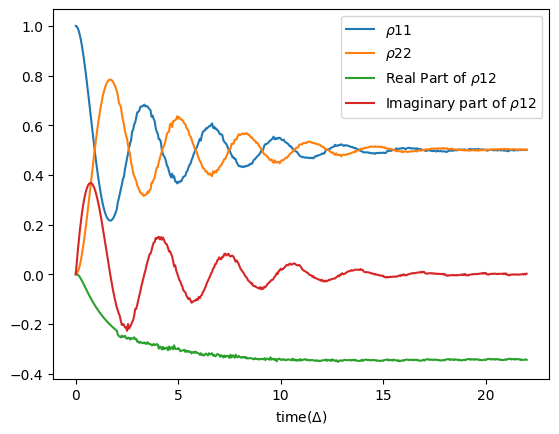

In [11]:
# Plot elements of rho
x = np.load('pinn_sb_traj.npy')

plt.plot(x[:,0], x[:, 1], label=r'$\rho$11') # Population of state_1
plt.plot(x[:,0], x[:, 4], label=r'$\rho$22')  # Population of state_1
plt.plot(x[:,0], np.real(x[:, 2]), label=r'Real Part of $\rho$12') # Real part of coherent term r_12
plt.plot(x[:,0], np.imag(x[:, 2]), label=r'Imaginary part of $\rho$12') # Real part of coherent term r_21
plt.legend()
plt.xlabel(r'time($\Delta$)')

Text(0, 0.5, 'Trace')

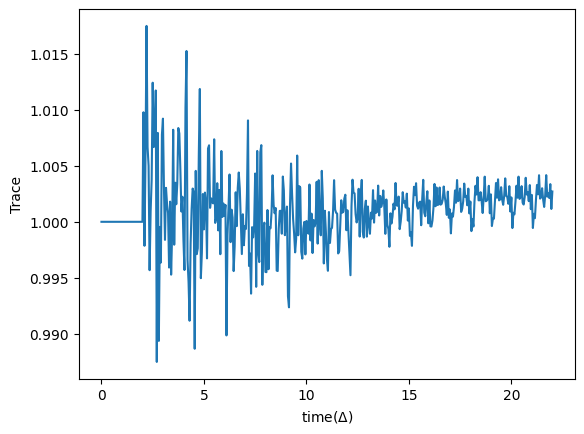

In [12]:
# Plot trace vs time
x = np.load('pinn_sb_traj.npy')
trace = np.real(x[:,1] + x[:,4])

plt.plot(x[:,0], trace)
plt.xlabel(r'time($\Delta$)')
plt.ylabel('Trace')

# Let's do it for FMO complex

In [13]:
# input for MLQD package, more details are given at https://github.com/Arif-PhyChem/MLQD

# For better training, you can also optimize the model by setting 'hyperParam': 'True'

param={
    'n_states': 7,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here RCDYN and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'training_data/fmo/pinn/x',           # str: (Optional) The prepared X file
      'YfileIn': 'training_data/fmo/pinn/y',           # str: (Optional) The prepared Y file
      'hyperParam': 'False',           # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'pinn': 'True',
      'patience': 30,
      'OptEpochs': 30,
      'TrEpochs': 10,
      'max_evals': 30,
      'systemType': 'FMO'
      }
quant_dyn(**param)

MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

In [14]:
!ls trained_models

FMO_cnn_model-01-tloss-4.355e-02-vloss-5.034e-03.keras
FMO_cnn_model-02-tloss-3.093e-03-vloss-1.827e-03.keras
FMO_cnn_model-03-tloss-1.513e-03-vloss-1.228e-03.keras
FMO_cnn_model-04-tloss-1.189e-03-vloss-9.184e-04.keras
FMO_cnn_model-05-tloss-8.762e-04-vloss-4.464e-04.keras
FMO_cnn_model-06-tloss-4.380e-04-vloss-3.656e-04.keras
FMO_cnn_model-07-tloss-3.560e-04-vloss-1.654e-04.keras
FMO_cnn_model-09-tloss-2.293e-04-vloss-1.066e-04.keras
SB_cnn_model-01-tloss-1.304e-01-vloss-8.789e-03.keras
SB_cnn_model-02-tloss-6.850e-03-vloss-5.073e-03.keras
SB_cnn_model-03-tloss-3.616e-03-vloss-3.094e-03.keras
SB_cnn_model-04-tloss-1.983e-03-vloss-1.225e-03.keras
SB_cnn_model-05-tloss-7.475e-04-vloss-3.641e-04.keras
SB_cnn_model-06-tloss-3.557e-04-vloss-2.182e-04.keras
SB_cnn_model-07-tloss-1.780e-04-vloss-1.579e-04.keras
SB_cnn_model-09-tloss-2.364e-04-vloss-1.063e-04.keras


In [15]:
# Grab trained FMO model with maximum epoch number

from datetime import datetime

# Directory containing the models
model_dir = "trained_models"

# List all models in the directory
models = [f for f in os.listdir(model_dir) if f.startswith("FMO") and f.endswith(".keras")]

# Get file paths and their timestamps
model_paths = [os.path.join(model_dir, f) for f in models]
model_info = [(f, os.path.getmtime(f)) for f in model_paths]

# Sort models by timestamp
sorted_models = sorted(model_info, key=lambda x: x[1])

trained_models = {}

for model, timestamp in sorted_models:
  model_name = model.split("/")[1]
  epoch_number = int(model_name.split("-")[1])

  trained_models[epoch_number] = model

# Find the maximum epoch number
max_epoch = max(trained_models.keys())

# Get the model with the largest epoch number
max_epoch_model = trained_models[max_epoch]

print("Model with the largest epoch:", max_epoch_model)

Model with the largest epoch: trained_models/FMO_cnn_model-09-tloss-2.293e-04-vloss-1.066e-04.keras


In [16]:
# Test trajectory
!ls trace_conservation/test_data/fmo

7_initial-1_gamma-400.0_lambda-40.0_temp-90.0.npy


In [17]:
xx = np.load('trace_conservation/test_data/fmo/7_initial-1_gamma-400.0_lambda-40.0_temp-90.0.npy')

x = xx[0:41,1:]

param={
        'n_states': 7,
        'time': 2,
        'QDmodel': 'useQDmodel',     # str: create QD model. The dafault option is useQDmodel
        'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
        'XfileIn': x,           # input x
        'ostl_steps': 20, # The number of time steps predicted in one shot
        'gamma': 400,
        'lamb': 40,
        'temp': 90,
        'cons_trace': 'False', # Option for U-aware HC constraint
        'systemType': 'FMO', # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO)
        'QDmodelIn': max_epoch_model,    # Trained model
        'QDtrajOut': 'pinn_fmo_traj'  # predicted trajectory will be saved with this name
      }
quant_dyn(**param)


MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 2010, 80)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 2010, 110)           │          26,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 2010, 80)            │          26,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1005, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 80400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │       2,572,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 980)                 │         126,420 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,756,786 (10.52 MB)

 Trainable params: 2,756,786 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

ml_dyn.RCDYN: Running recursive dynamics with CNN model......
ml_dyn.RCDYN: Dynamics is saved in a file  "pinn_fmo_traj"
ml_dyn.RCDYN: Time taken = 1.648921251296997 sec
No reference trajectory was provided, so dynamics is not plotted. You can provide reference trajectory with "refTraj"
MLQD is ended at 2024-09-03 06:26:53.720419


Text(0.5, 0, 'time(ps)')

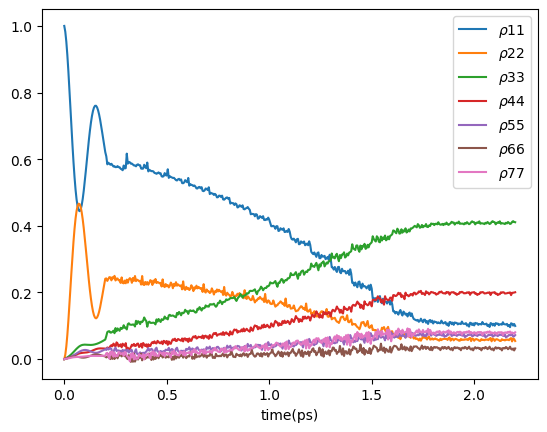

In [18]:
# Plotting diagonal terms of rho
x = np.load('pinn_fmo_traj.npy')

label=1
for i in [1, 9, 17, 25, 33, 41, 49]:
  plt.plot(x[:,0], x[:, i], label=r'$\rho$'+str(label)+str(label))
  label += 1
plt.legend()
plt.xlabel('time(ps)')

Text(0, 0.5, 'Trace')

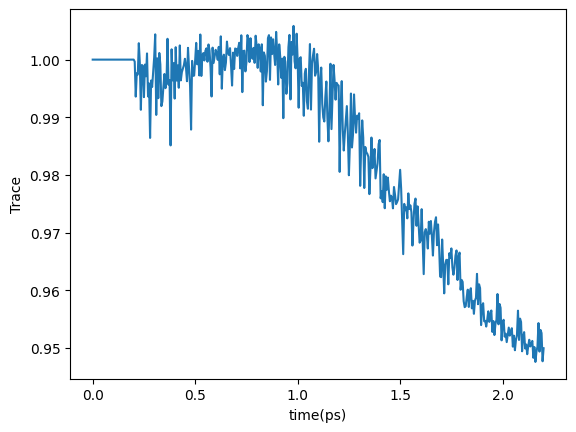

In [19]:
# Plot trace vs time
x = np.load('pinn_fmo_traj.npy')
trace = 0.0
for i in [1, 9, 17, 25, 33, 41, 49]:
  trace += np.real(x[:,i])

plt.plot(x[:,0], trace)
plt.xlabel('time(ps)')
plt.ylabel('Trace')